## Analyze whether SNWD varies more from year to year or from place to place.

In [12]:
import pandas as pd
import numpy as np
import urllib
import math
import matplotlib.pyplot as plt

In [2]:
import findspark
findspark.init()

from pyspark import SparkContext
#sc.stop()
sc = SparkContext(master="local[3]",pyFiles=['lib/numpy_pack.py','lib/spark_PCA.py','lib/computeStats.py'])

from pyspark import SparkContext
from pyspark.sql import *
sqlContext = SQLContext(sc)

In [3]:
import sys
sys.path.append('./lib')

import numpy as np
from numpy_pack import packArray,unpackArray
from spark_PCA import computeCov
from computeStats import computeOverAllDist, STAT_Descriptions

In [4]:
### Read the data frame from pickle file

data_dir='../../Data/Weather'
# file_index='BBBSBBBB'
file_index='SBSBBSSB' #for hwk5
meas='SNWD'

from pickle import load

#read statistics
filename=data_dir+'/STAT_%s.pickle'%file_index
STAT,STAT_Descriptions = load(open(filename,'rb'))
print('keys from STAT=',STAT.keys())

#!ls -ld $data_dir/*.parquet

#read data
filename=data_dir+'/decon_%s_%s.parquet'%(file_index,meas)

df=sqlContext.read.parquet(filename)
print(df.count())
df.show(2)

('keys from STAT=', ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP'])
438
+------------------+-------------------+-------------------+---------+--------+--------+---------+-----------+-------------------+--------------------+-------------------+------------------+-----------+------------+------+--------------------+------+
|           coeff_1|            coeff_2|            coeff_3|elevation|   label|latitude|longitude|measurement|              res_1|               res_2|              res_3|          res_mean|    station|   total_var|undefs|              vector|  year|
+------------------+-------------------+-------------------+---------+--------+--------+---------+-----------+-------------------+--------------------+-------------------+------------------+-----------+------------+------+--------------------+------+
|-9550.204522426688|-333.13090779716777|-2828.7879349546724|    889.4|SBSBBSSB| 46.7744|-116.1761|       SNWD| 0.1084572525440414| 0.10737246002040471|0.02915249653616075|0.

In [5]:
print df.columns

['coeff_1', 'coeff_2', 'coeff_3', 'elevation', 'label', 'latitude', 'longitude', 'measurement', 'res_1', 'res_2', 'res_3', 'res_mean', 'station', 'total_var', 'undefs', 'vector', 'year']


In [81]:
#extract longitude and latitude for each station
# feature='coeff_1'
sqlContext.registerDataFrameAsTable(df,'weather')
#Features=', '.join(['coeff_1', 'coeff_2', 'coeff_3', 'elevation', 'latitude', 'longitude',\
#          'res_1', 'res_2', 'res_3', 'res_mean', 'year'])
Features='station, year, coeff_1'
Query="SELECT %s FROM weather"%Features
print(Query)
pdf = sqlContext.sql(Query).toPandas()
pdf.head()

SELECT station, year, coeff_1 FROM weather


,station,year,coeff_1
0,USC00102892,1964.0,-9550.204522
1,USC00104150,1969.0,-9018.948332
2,USC00104150,1964.0,-8609.616332
3,USC00104150,2000.0,-5620.240470
4,USC00107046,1986.0,-5300.000990


In [83]:
year_station_table=pdf.pivot(index='year', columns='station', values='coeff_1')  # was values='coeff_2'
year_station_table.head(10)

station,USC00100528,USC00101831,USC00102246,USC00102513,USC00102845,USC00102892,USC00104150,USC00105236,USC00106152,USC00106421,...,USC00456789,USC00457015,USC00457059,USC00457180,USC00457223,USC00457267,USC00457956,USC00458348,USW00024110,USW00024149
year,,,,,,,,,,,,,,,,,,,,,
1916.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1917.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1922.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1927.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1936.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1937.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Estimating the effect of the year vs the effect of the station

To estimate the effect of time vs. location on the first eigenvector coefficient we
compute:

* The average row: `mean-by-station`
* The average column: `mean-by-year`

We then compute the RMS before and after subtracting either  the row or the column vector.

In [84]:
def RMS(Mat):
    return np.sqrt(np.nanmean(Mat**2))

mean_by_year=np.nanmean(year_station_table,axis=1)
mean_by_station=np.nanmean(year_station_table,axis=0)
tbl_minus_year = (year_station_table.transpose()-mean_by_year).transpose()
tbl_minus_station = year_station_table-mean_by_station

print 'total RMS                   = ',RMS(year_station_table)
print 'RMS removing mean-by-station= ',RMS(tbl_minus_station)
print 'RMS removing mean-by-year   = ',RMS(tbl_minus_year)

total RMS                   =  3056.92085277
RMS removing mean-by-station=  1664.6460512
RMS removing mean-by-year   =  2294.48138564


initial RMS= 3056.92085277
0 after removing mean by year    = 2294.48138564
0 after removing mean by stations= 1496.31136927
1 after removing mean by year    = 1231.00348075
1 after removing mean by stations= 1100.31476965
2 after removing mean by year    = 1028.61743796
2 after removing mean by stations= 988.13590083
3 after removing mean by year    = 965.03499948
3 after removing mean by stations= 951.757083583
4 after removing mean by year    = 944.070542908
4 after removing mean by stations= 939.587599209


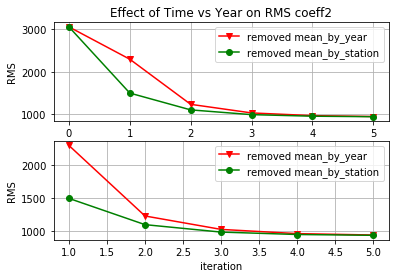

In [85]:
T=year_station_table
print 'initial RMS=',RMS(T)

x_data = []
year_rem = []
station_rem = []

x_data.append(0)
year_rem.append(RMS(T))
station_rem.append(RMS(T))

for i in range(5):
    x_data.append(i+1)
    mean_by_year=np.nanmean(T,axis=1)
    T=(T.transpose()-mean_by_year).transpose()
    print i,'after removing mean by year    =',RMS(T)
    year_rem.append(RMS(T))
    mean_by_station=np.nanmean(T,axis=0)
    T=T-mean_by_station
    print i,'after removing mean by stations=',RMS(T)
    station_rem.append(RMS(T))

plt.subplot(211)
plt.plot(x_data, year_rem, 'r', marker='v', label='removed mean_by_year')
plt.plot(x_data, station_rem, 'g', marker='o', label='removed mean_by_station')
plt.grid(True)
plt.xlabel("iteration")
plt.ylabel("RMS")
plt.legend()
plt.title('Effect of Time vs Year on RMS coeff2')

plt.subplot(212)
plt.plot(x_data[1:], year_rem[1:], 'r', marker='v', label='removed mean_by_year')
plt.plot(x_data[1:], station_rem[1:], 'g', marker='o', label='removed mean_by_station')
plt.grid(True)
plt.xlabel("iteration")
plt.ylabel("RMS")
plt.legend()

plt.show()